In [34]:
import torch
import torchvision
import construct
import prep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
image_dir = 'data/raman_images'
labels_file = 'data/labels.csv'

DATA = prep.prep_data(pd.read_csv(labels_file), image_dir)

transforms = torchvision.transforms.Compose([
                            torchvision.transforms.ToPILImage(),
                            torchvision.transforms.RandomRotation((-180,180)),
                            torchvision.transforms.CenterCrop((325)),
                            torchvision.transforms.ToTensor()
                                      ])

/Users/Will/GradSchool/CHEME/Project/FmPM/fmpm/will/prep.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  identification[i] = False
/Users/Will/GradSchool/CHEME/Project/FmPM/fmpm/will/prep.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  identification[i] = True


In [ ]:
len(DATA)

In [ ]:
#Declaring iterator. The thing that will loop through our dataset.

data = prep.tenX_dataset(DATA, 'data/raman_images', transform=transforms)
criterion = torch.nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test, train = torch.utils.data.random_split(data, [int(.15*len(data)), len(data)-int(.15*len(data))])
BATCH_SIZE = 32
epochs = 100

In [10]:
class myModel(torch.nn.Module):
    def __init__(self):
        """
        Initializes CNN. Here we just define layer shapes that we call in the forward func
        """
        super().__init__()

        self.conv1 = torch.nn.Conv2d(in_channels = 3, 
                               out_channels = 6, 
                               kernel_size = 5,
                                    bias = False)
                
        #Convultion layer 2. See above
        self.conv2 = torch.nn.Conv2d(in_channels = 6, 
                               out_channels = 12, 
                               kernel_size = 5,
                                    bias = False)
        
        self.fc_1 = torch.nn.Linear(39 * 39 * 12, 256)
        self.fc_2 = torch.nn.Linear(256, 2)
        self.drop = torch.nn.Dropout(p=.2)
        self.batch1 = torch.nn.BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.batch2 = torch.nn.BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            
    def forward(self, x):
        """
        Function that performs all the neural network forward calculation i.e.
        takes image data from the input of the neural network to the output
        """
        
        x = self.conv1(x)
        x = self.batch1(x)
        x = torch.nn.functional.max_pool2d(x, kernel_size = 2)
        x = torch.nn.functional.leaky_relu(x)
        x = self.conv2(x)
        x = self.batch2(x)
        x = torch.nn.functional.max_pool2d(x, kernel_size = 4)
        x = torch.nn.functional.leaky_relu(x)
        x = x.view(x.shape[0], -1)  
        x = self.fc_1(x) 
        x = torch.nn.functional.leaky_relu(x)
        x = self.drop(x)
        x = self.fc_2(x) 
        return x

model1 = myModel()

In [ ]:
cnn, loss, acc = construct.train(epochs, BATCH_SIZE, train, criterion, 'Adam', model1)

In [ ]:
images, labels, predictions, weights, acc = construct.get_predictions(BATCH_SIZE, cnn, test)

In [ ]:
(labels[:,1] == predictions).float().sum()/len(predictions)

In [46]:
(labels[:,1] == 0).float().sum()/len(predictions)


False

In [58]:
x = 0
for i in list(DATA['isPlastic']):
    if i is np.array([0, 1]): x+=1
    print(i)

[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1

0

In [11]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle = True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
models = []
losses = []
train_accs = []
test_accs = []
naive_accs = []
epochs = 150
BATCH_SIZE = 32
criterion = torch.nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transforms = torchvision.transforms.Compose([
                            torchvision.transforms.ToPILImage(),
                            torchvision.transforms.RandomRotation((-180,180)),
                            torchvision.transforms.CenterCrop((325)),
                            torchvision.transforms.ToTensor()
                                      ])

for train_idx, test_idx in kf.split(DATA):
    curr_model = myModel()
    train = DATA.iloc[train_idx].reset_index()
    test = DATA.iloc[test_idx].reset_index()
    train_data = prep.tenX_dataset(train, 'data/raman_images', transform=transforms)
    test_data = prep.tenX_dataset(test, 'data/raman_images', transform=transforms)
    cnn, train_loss, train_acc = construct.train(epochs, BATCH_SIZE, 
                                                 train_data, criterion, 'Adam', curr_model, device, with_eval)
    models.append(cnn)
    train_accs.append(train_acc)
    losses.append(train_loss)
    images, labels, predictions, weights, test_acc = construct.get_predictions(BATCH_SIZE, cnn, test_data)
    test_accs.append(test_acc)
    naive_accs.append((labels[:,1] == 0).float().sum()/len(predictions))
    

EPOCH: 0, acc: 0.7900641010357783, loss: 2.7098383399156423
tensor([[  4.1115,  -3.8441],
        [  8.4361, -22.1755],
        [  0.0404,   0.7038],
        [ -0.3103,  -3.6072],
        [  9.8688,  -8.1858],
        [ -4.0381, -17.5648],
        [  6.0180, -13.0577],
        [ -5.9474, -12.5952],
        [ -1.2263, -20.1607],
        [  3.5325,  -4.7380],
        [  3.1844,  -4.2045],
        [ -2.7946,  -8.7776],
        [ -5.3240,  -4.1422],
        [ -0.6203,  -0.3052],
        [ 11.8645, -12.2592],
        [  4.9848,  -5.6730],
        [ -1.7367, -29.2680],
        [ 10.2992, -16.1698],
        [  6.8244,  -9.5320],
        [  4.4301,  -5.6262],
        [  2.1201,  -8.0676],
        [  8.1173,  -8.6841],
        [ -0.0764,  -2.1811],
        [ -0.4984,   0.0350]], grad_fn=<AddmmBackward>)
tensor([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
  

EPOCH: 26, acc: 0.879006408728086, loss: 0.2767506941006734
EPOCH: 27, acc: 0.8557692307692307, loss: 0.3124252259731293
EPOCH: 28, acc: 0.8862179471896245, loss: 0.29399682925297665
EPOCH: 29, acc: 0.8838141010357783, loss: 0.28375141551861394
EPOCH: 30, acc: 0.8830128220411447, loss: 0.28586552807917964
tensor([[ 2.0893e+00, -1.0418e+00],
        [ 1.8001e+00, -8.1748e-01],
        [-1.1717e+00,  4.5349e-01],
        [ 4.4975e-01, -4.0047e-01],
        [-1.5238e-01, -1.4280e+00],
        [ 3.7839e+00, -2.3669e+00],
        [-4.9785e-01,  5.2922e-01],
        [ 1.6949e+00, -1.2782e+00],
        [ 1.8036e+00, -1.8312e+00],
        [-4.5519e-01, -1.4761e+00],
        [ 5.2965e+00, -1.2226e+00],
        [-1.1168e-01, -3.6241e-01],
        [ 2.2321e+00, -1.9555e+00],
        [ 2.8158e+00, -2.4031e+00],
        [ 7.1230e-01, -1.9594e-01],
        [ 2.9021e+00, -4.9180e-01],
        [ 5.2882e+00, -3.5921e+00],
        [ 1.5338e+01,  5.3503e+00],
        [ 3.9536e+00, -1.0546e+00],
        [

EPOCH: 56, acc: 0.8822115384615384, loss: 0.3345311771218593
EPOCH: 57, acc: 0.8758012835796063, loss: 0.28046162999593294
EPOCH: 58, acc: 0.8846153846153846, loss: 0.2614617204436889
EPOCH: 59, acc: 0.8910256394973168, loss: 0.2553507181314322
EPOCH: 60, acc: 0.8910256394973168, loss: 0.2744631377550272
tensor([[  8.5097,  -2.5911],
        [  0.2432,  -0.4360],
        [  2.3136,  -7.0995],
        [  4.5142, -10.7120],
        [  0.2635,  -0.6835],
        [  5.2857,  -5.9666],
        [  7.5023,  -8.3530],
        [  1.3875,  -0.0265],
        [  3.7654,  -3.2993],
        [  0.4563,  -0.5067],
        [  0.2242,  -2.4451],
        [  2.9642,  -2.2825],
        [  0.6196,  -1.0730],
        [  0.3921,  -0.5289],
        [  1.8635,  -2.5347],
        [  0.3469,  -0.4127],
        [  0.8599,  -3.3429],
        [  5.2071,  -5.1156],
        [  0.2082,  -0.5493],
        [ -0.0452,  -0.2176],
        [  0.7666,  -1.6111],
        [  3.7340,  -1.1839],
        [ -3.2261,   1.6814],
    

EPOCH: 86, acc: 0.8894230769230769, loss: 0.27565471541423064
EPOCH: 87, acc: 0.8982371779588553, loss: 0.2316022326166813
EPOCH: 88, acc: 0.8974358989642217, loss: 0.25870756804943085
EPOCH: 89, acc: 0.8846153846153846, loss: 0.3305428114074927
EPOCH: 90, acc: 0.902243591271914, loss: 0.2387570750254851
tensor([[  1.6528,  -5.7859],
        [  1.0919,  -1.2229],
        [  4.8119,  -8.6747],
        [  0.9360,  -1.6276],
        [  2.8446,  -3.9848],
        [ 22.0275, -11.1279],
        [  0.7709,  -1.1257],
        [  1.3208,  -1.1203],
        [  0.6358,  -0.9970],
        [  1.3314,  -1.4498],
        [  1.0718,  -2.6695],
        [  3.9830,  -4.4250],
        [  0.8874,  -1.0468],
        [  4.1021,  -4.7768],
        [  3.8966,  -1.5994],
        [ -0.5415,  -0.1092],
        [  7.9358,  -2.9887],
        [  1.1352,  -1.4245],
        [  0.8938,  -0.5993],
        [  1.1495,  -3.1859],
        [  7.3037,  -2.2394],
        [ -8.3577,   6.5960],
        [  3.6507,  -1.8427],
    

EPOCH: 116, acc: 0.8990384615384616, loss: 0.2907569935688606
EPOCH: 117, acc: 0.9046474374257601, loss: 0.24713491161282247
EPOCH: 118, acc: 0.8854166681949909, loss: 0.24716637226251456
EPOCH: 119, acc: 0.9038461538461539, loss: 0.236674964427948
EPOCH: 120, acc: 0.8998397451180679, loss: 0.2721658412080545
tensor([[  0.6850,  -1.1411],
        [  1.0150,  -2.8800],
        [ -2.2036,  -5.0578],
        [  0.8122,  -0.6932],
        [  3.4293, -10.5764],
        [  0.8220,  -3.1164],
        [  1.1523,  -3.7245],
        [ -2.7547,   1.5761],
        [ -0.8620,  -4.8299],
        [ -0.1349,  -0.0675],
        [  2.4614,  -3.3039],
        [  1.8320,  -4.0058],
        [ -4.8941, -12.4710],
        [ -2.6294,   1.2418],
        [  0.1753,  -1.0013],
        [  2.0607,  -3.2206],
        [  2.6540,  -2.0072],
        [  1.4720,  -3.7932],
        [  0.5055,  -1.8051],
        [ 11.8133, -16.5034],
        [ -0.6661,  -2.3030],
        [  6.3111,  -1.9442],
        [ -1.7731, -17.8086],

EPOCH: 146, acc: 0.90625, loss: 0.2548226989232577
EPOCH: 147, acc: 0.9142628220411447, loss: 0.23655254795001104
EPOCH: 148, acc: 0.9030448702665476, loss: 0.23592193940511116
EPOCH: 149, acc: 0.919070514348837, loss: 0.23764551087067678
EPOCH: 150, acc: 0.9174679471896245, loss: 0.2041394802240225
tensor([[  1.8364,  -2.1702],
        [  0.7472,  -2.5834],
        [  0.6678,  -1.4148],
        [  1.3022,  -2.1825],
        [ -0.6226,  -0.8859],
        [  4.8126,  -9.6264],
        [ -2.1897,   1.0034],
        [  0.6423,  -0.8984],
        [ 19.4545, -20.1981],
        [  0.4093,  -1.4943],
        [  3.7257,  -2.3306],
        [  2.3810,  -2.0755],
        [ 16.9528, -14.9566],
        [  4.5715,  -5.8964],
        [  2.9283,  -1.2584],
        [ -4.5510,  -0.1454],
        [  3.7077,  -2.4501],
        [  0.3684,  -0.7236],
        [  2.5699,  -1.3372],
        [  3.9604,  -2.3384],
        [  0.4134,  -0.8562],
        [  0.4525,  -1.9515],
        [  0.3373,  -0.6761],
        [

EPOCH: 21, acc: 0.8839423060417175, loss: 0.30067676535019505
EPOCH: 22, acc: 0.8764423086093023, loss: 0.2847841794674213
EPOCH: 23, acc: 0.8970192304024329, loss: 0.2909402342943045
EPOCH: 24, acc: 0.8994230765562791, loss: 0.2767711327626155
EPOCH: 25, acc: 0.8795192287518427, loss: 0.27121603603546435
tensor([[-1.1364e-02,  5.1855e-01],
        [ 8.6252e-01,  9.0689e-02],
        [ 4.2806e+00, -3.6798e+00],
        [ 1.6572e+00,  1.3281e-01],
        [ 2.1078e+00,  2.8313e+00],
        [ 2.1564e+00, -2.9457e-01],
        [-1.1359e+00, -1.5650e+01],
        [ 1.3991e+00, -2.1443e+00],
        [ 2.0668e+00, -6.6224e+00],
        [ 1.7960e+00,  2.2926e+00],
        [ 3.3005e+00, -3.8985e-01],
        [ 1.4283e+00, -6.2450e-01],
        [ 2.5793e+00, -4.1796e+00],
        [ 2.7683e+00, -3.6935e+00],
        [ 2.0171e+00,  6.9131e+00],
        [ 6.1139e-01, -5.3597e-01],
        [ 3.3960e-01, -1.4793e+00],
        [ 9.1983e-01, -2.4487e+00],
        [ 6.0502e-01, -1.1125e+00],
        [

EPOCH: 51, acc: 0.8729807688639715, loss: 0.31888902015410936
EPOCH: 52, acc: 0.8946153842485868, loss: 0.26290803173413646
EPOCH: 53, acc: 0.9031730752724868, loss: 0.27053665541685545
EPOCH: 54, acc: 0.8874038457870483, loss: 0.2764824754916705
EPOCH: 55, acc: 0.8994230765562791, loss: 0.2444062184255857
tensor([[-8.4846e+00, -1.9511e+01],
        [ 3.4730e+00, -3.7619e+00],
        [ 7.8426e-01,  1.2377e+00],
        [ 1.3210e+00, -2.1477e+00],
        [ 2.4170e+00, -6.3902e-01],
        [ 3.6703e+00, -3.0571e+00],
        [ 4.3183e-01, -2.3535e+00],
        [ 3.6252e-01,  5.5473e-02],
        [-3.8860e+00,  5.5276e-01],
        [-8.4727e-01,  1.3689e+00],
        [ 1.1744e+00, -1.7873e+00],
        [-3.9242e+00, -1.0361e+01],
        [-7.3909e+00, -1.4638e+01],
        [ 3.2326e+00, -1.2749e+00],
        [-6.1446e+00, -1.5452e+01],
        [-7.8293e+00, -1.9290e+01],
        [ 1.5808e+00, -9.9802e-01],
        [ 3.2587e+00, -3.9386e+00],
        [-6.5143e+00, -1.8112e+01],
        

EPOCH: 81, acc: 0.9103846137340252, loss: 0.2256041902762193
EPOCH: 82, acc: 0.8928846166684077, loss: 0.25745248794555664
EPOCH: 83, acc: 0.8932692316862253, loss: 0.259285922233875
EPOCH: 84, acc: 0.9127884598878714, loss: 0.22842306586412284
EPOCH: 85, acc: 0.8963461518287659, loss: 0.23266152292490005
tensor([[  2.6859,  -0.2637],
        [ -0.0272,  -6.0663],
        [  0.4700,  -3.0126],
        [  1.1321,   3.4239],
        [  0.2655,  -0.5029],
        [  0.8614,  -5.4244],
        [  0.2381,  -0.8394],
        [  2.3966,  -2.3365],
        [  0.9770,  -1.3930],
        [ -5.3561, -25.7310],
        [ -0.1528,   0.5029],
        [  0.3098,   0.8327],
        [ -0.9751,  -3.8323],
        [  1.4126,  -3.6955],
        [ -0.6141,  -4.3844],
        [ -0.3122,   4.4988],
        [  0.6599,  -0.4500],
        [ -1.8345,  -2.8271],
        [ -1.9010,  -7.5540],
        [  0.2973,   0.4916],
        [  5.1168,  -9.1496],
        [ -0.6176,  -2.7488],
        [  0.4191,   1.0558],
   

EPOCH: 111, acc: 0.905288462455456, loss: 0.2548979027913167
EPOCH: 112, acc: 0.9158653846153846, loss: 0.2096964757029827
EPOCH: 113, acc: 0.9193269243607154, loss: 0.21954579479419267
EPOCH: 114, acc: 0.9028846163016099, loss: 0.23121584665316802
EPOCH: 115, acc: 0.9145192320530231, loss: 0.19808749281443083
tensor([[ 6.4149, -0.0764],
        [ 0.7138, -0.5834],
        [ 1.4221,  0.0984],
        [17.9303, -1.2505],
        [ 9.7739, -3.4330],
        [10.1324,  0.0339],
        [15.4667,  0.9475],
        [ 8.5562, -2.5882],
        [ 0.4708,  1.1328],
        [16.3076, -0.3771],
        [ 2.9779, -3.1351],
        [ 0.9446,  0.5268],
        [ 4.9787, -5.1316],
        [ 0.2689, -0.6652],
        [ 0.5058, -3.9609],
        [ 0.3767, -1.4469],
        [ 3.9559,  0.0862],
        [ 1.7432, -0.4917],
        [25.5901,  0.4933],
        [ 1.6384, -1.1367],
        [10.5264, -2.9712],
        [ 0.1427, -1.2771],
        [ 0.9955,  0.3139],
        [ 3.6058, -1.8216],
        [ 0.3426

EPOCH: 141, acc: 0.913173074905689, loss: 0.24714666490371412
EPOCH: 142, acc: 0.9000961551299462, loss: 0.23845434819276518
EPOCH: 143, acc: 0.9217307705145615, loss: 0.20024268730328634
EPOCH: 144, acc: 0.9248076906571021, loss: 0.20952772406431344
EPOCH: 145, acc: 0.9320192291186407, loss: 0.17831244548925987
tensor([[ 1.2949, -8.2996],
        [ 2.1344, -0.9266],
        [ 0.3864,  0.1575],
        [ 0.8411, -1.7518],
        [ 2.0784, -0.5933],
        [ 1.8191, -1.1723],
        [ 2.5146, -2.3337],
        [30.2669,  6.9579],
        [ 1.2710, -0.8573],
        [ 3.2393, -7.6892],
        [ 0.9572, -0.5426],
        [ 0.9809, -1.2346],
        [ 0.2742, -1.0387],
        [ 1.3438, -1.2894],
        [ 2.2242, -1.1142],
        [ 1.4036, -3.3491],
        [ 2.4585, -3.1967],
        [ 2.8579, -2.7790],
        [ 2.1792, -1.7588],
        [ 7.6604, -4.4345],
        [ 2.2342, -3.0499],
        [ 5.0782, -0.3086],
        [ 0.6478,  1.9216],
        [ 1.7850, -1.9881],
        [ 1.29

EPOCH: 16, acc: 0.8654807714315561, loss: 0.30701702202741915
EPOCH: 17, acc: 0.8815384598878714, loss: 0.28078702894540936
EPOCH: 18, acc: 0.8705769227101252, loss: 0.3173836893760241
EPOCH: 19, acc: 0.8705769227101252, loss: 0.31502655836252064
EPOCH: 20, acc: 0.8771153825979966, loss: 0.29220419090527755
tensor([[ 1.7666e-01, -7.6789e-02],
        [ 2.3828e+00,  1.1278e-01],
        [ 5.5897e-01, -3.4393e-01],
        [ 4.3182e+00, -3.7470e-01],
        [ 9.1425e-01, -4.8759e-01],
        [ 1.4023e+00, -8.6629e-03],
        [ 6.5308e-01, -7.5762e-01],
        [ 4.9943e+00, -1.2211e+00],
        [ 6.9630e+00, -6.6405e-01],
        [ 3.7024e+00, -1.6340e+00],
        [ 2.5064e+00, -7.1546e-01],
        [ 3.4347e+00, -1.5804e+00],
        [ 4.3011e-01, -3.4072e-02],
        [ 2.9335e+00, -8.4000e-01],
        [ 3.1305e+00, -2.1280e+00],
        [-3.3332e+00,  2.4019e-01],
        [ 1.2234e+00, -7.4901e-01],
        [ 3.2314e+00,  4.1075e-04],
        [ 4.2334e+00, -1.3849e+00],
       

EPOCH: 46, acc: 0.8699038441364582, loss: 0.29764243501883286
EPOCH: 47, acc: 0.8832692320530231, loss: 0.28251217764157516
EPOCH: 48, acc: 0.8856730782068692, loss: 0.25317152876120347
EPOCH: 49, acc: 0.8784615397453308, loss: 0.3208640389717542
EPOCH: 50, acc: 0.8657692304024329, loss: 0.31068125940286195
tensor([[ 1.3216, -0.7434],
        [ 0.0194, -0.3078],
        [ 1.6661, -1.1385],
        [10.4816, -1.9000],
        [19.0008, -2.0202],
        [ 1.2869, -1.1247],
        [-0.7046, -2.2633],
        [-2.6466, -0.5672],
        [16.5180, -2.4314],
        [ 1.6175, -1.2464],
        [ 4.0458, -1.2885],
        [-2.6233, -0.5638],
        [ 2.4708, -0.8836],
        [ 1.2338, -1.3054],
        [ 1.7046, -1.1773],
        [-0.6895, -1.0119],
        [ 2.0891, -0.4385],
        [-7.6134, -1.9292],
        [ 0.4144, -0.4658],
        [ 3.1187, -2.1768],
        [ 3.8353, -1.7546],
        [ 0.9230, -0.1474],
        [ 3.9379, -0.2643],
        [ 1.9985,  0.0944],
        [11.5162, -

EPOCH: 76, acc: 0.9134615384615384, loss: 0.22364662071833244
EPOCH: 77, acc: 0.9025000012837924, loss: 0.24089874785680038
EPOCH: 78, acc: 0.8915384595210736, loss: 0.24682907072397378
EPOCH: 79, acc: 0.8976923089761001, loss: 0.24849707919817704
EPOCH: 80, acc: 0.8795192287518427, loss: 0.2602589692060764
tensor([[  0.5343,  -7.3107],
        [  4.0880,  -2.0511],
        [  5.6396,  -4.0389],
        [  0.3931,  -0.5849],
        [  1.6149,  -7.9152],
        [  2.5302,  -2.6127],
        [  0.7105, -11.6038],
        [ -2.5141,  -0.2959],
        [  0.3931,  -1.0353],
        [  3.8353,  -0.9782],
        [ 10.2625,  -3.5953],
        [  0.7466,  -0.8245],
        [  3.1568,  -2.6966],
        [ -0.7088,  -3.2310],
        [ -0.2614,  -0.7562],
        [  3.6058,  -2.7324],
        [  1.2128,  -1.3906],
        [  0.9006,  -0.5023],
        [  1.2140,  -1.1242],
        [ -1.8334,  -0.9500],
        [  6.4071,  -2.5217],
        [  1.8640,  -9.3742],
        [  1.0605,  -0.6297],
 

EPOCH: 106, acc: 0.8976923089761001, loss: 0.24217181308911398
EPOCH: 107, acc: 0.9083653825979966, loss: 0.2190112849840751
EPOCH: 108, acc: 0.922403844503256, loss: 0.21254274249076843
EPOCH: 109, acc: 0.9186538457870483, loss: 0.20101403903502685
EPOCH: 110, acc: 0.9079807675801791, loss: 0.2370902752647033
tensor([[ 0.6340, -0.5291],
        [ 2.6321, -1.4114],
        [-7.8800,  3.2102],
        [ 0.9725, -0.5765],
        [ 5.7992, -2.0448],
        [ 5.3747, -5.4719],
        [ 5.8410, -2.8385],
        [ 4.3526, -1.8056],
        [11.1814, -6.8567],
        [-2.5360,  0.3204],
        [ 5.8424, -2.4685],
        [-1.2015,  1.4266],
        [ 4.2162, -2.0133],
        [ 0.8970, -0.8956],
        [ 3.2989, -3.1966],
        [12.6680, -5.4395],
        [ 2.4602, -0.9634],
        [-0.0652,  0.7286],
        [ 1.9859, -1.3615],
        [-2.2018,  2.1662],
        [ 6.3777, -3.0898],
        [-0.1847, -0.2210],
        [ 1.6391, -1.4500],
        [-0.2606, -0.4163],
        [-3.4666

EPOCH: 136, acc: 0.9289423089761001, loss: 0.22853394941641733
EPOCH: 137, acc: 0.9258653842485868, loss: 0.2059400104559385
EPOCH: 138, acc: 0.9127884598878714, loss: 0.21966780263643998
EPOCH: 139, acc: 0.9149038470708407, loss: 0.20216233799090752
EPOCH: 140, acc: 0.9166346146510198, loss: 0.2086297319485591
tensor([[ 1.3209e+00, -3.7749e+00],
        [ 3.1102e-01, -9.2320e-01],
        [ 2.1944e+00, -3.4507e+00],
        [-1.0652e+00, -8.1010e-01],
        [ 7.1627e-04, -6.7933e-01],
        [ 3.6738e+00, -2.3913e+00],
        [ 3.7710e+00, -3.7704e+00],
        [ 5.5068e+00, -2.7003e+00],
        [ 8.7947e+00, -9.8120e+00],
        [ 3.4939e+00, -4.4544e+00],
        [ 1.0320e+01, -8.6106e+00],
        [ 1.0386e+01, -1.0333e+01],
        [ 3.7173e-01, -1.0160e+00],
        [ 1.1264e+00, -1.5285e+00],
        [ 9.7308e+00,  5.7546e-02],
        [ 4.8762e+00, -4.6148e+00],
        [ 6.6336e+00, -6.5940e+00],
        [ 3.5576e+00, -4.3175e+00],
        [ 7.0081e-01, -8.5698e-01],
   

EPOCH: 11, acc: 0.8650961518287659, loss: 0.30848614413004655
EPOCH: 12, acc: 0.850673074905689, loss: 0.34563410396759325
EPOCH: 13, acc: 0.8500000009169946, loss: 0.3826005252508017
EPOCH: 14, acc: 0.8530769210595351, loss: 0.35815804738264817
EPOCH: 15, acc: 0.851346153479356, loss: 0.34845345410016865
tensor([[ 4.7849,  1.1326],
        [ 3.9847,  1.0105],
        [ 4.0043, -0.1510],
        [ 3.1470,  0.4615],
        [ 3.2228,  1.5931],
        [ 0.3774,  1.8400],
        [-1.5963, -4.0461],
        [-7.4251, -6.6424],
        [ 1.0082,  1.0207],
        [ 4.2639, -0.1500],
        [ 6.2682, -1.9077],
        [ 0.7352, -1.0141],
        [ 0.4424, -0.0141],
        [ 6.0507, -2.1650],
        [ 2.1329,  0.0727],
        [ 6.7024,  3.9939],
        [ 8.0862, -3.8355],
        [ 3.7864,  1.8277],
        [ 1.9710,  2.5252],
        [ 1.5765,  0.5757],
        [ 0.8888,  0.8595],
        [ 0.4908, -1.6678],
        [ 2.3615, -3.1179],
        [ 0.0261,  0.5045],
        [ 5.9970, -0.

EPOCH: 41, acc: 0.8753846150178176, loss: 0.2763746678829193
EPOCH: 42, acc: 0.8757692300356351, loss: 0.2782698835317905
EPOCH: 43, acc: 0.8795192287518427, loss: 0.2962363683260404
EPOCH: 44, acc: 0.8757692300356351, loss: 0.2724583068719277
EPOCH: 45, acc: 0.850673074905689, loss: 0.3010201328075849
tensor([[ 3.6228e-01, -6.3940e-01],
        [ 4.2042e-01, -4.7442e-01],
        [ 2.1901e+00, -6.9471e+00],
        [ 5.5405e-01, -2.6238e+00],
        [ 3.8843e-01, -5.0093e+00],
        [ 2.9471e+00, -2.0123e+00],
        [ 1.5892e+00, -2.4372e+00],
        [ 2.0464e-01, -1.3406e+00],
        [ 3.1586e-01, -9.4972e-01],
        [ 4.4425e-01, -1.4787e+00],
        [ 2.6968e+00, -5.0075e+00],
        [ 2.4195e-01, -4.0295e+00],
        [ 7.4315e-01, -9.3660e-01],
        [-7.0016e-01, -7.6076e-01],
        [ 1.4532e-01, -3.2203e-01],
        [ 1.9583e+00, -4.8930e+00],
        [ 4.1853e+00, -4.2662e+00],
        [ 1.9958e-01, -1.4462e+00],
        [ 3.4451e+00, -1.0187e+00],
        [ 9.

EPOCH: 71, acc: 0.8860576932246869, loss: 0.26497837557242465
EPOCH: 72, acc: 0.8753846150178176, loss: 0.2921882512477728
EPOCH: 73, acc: 0.8650961518287659, loss: 0.2912495697920139
EPOCH: 74, acc: 0.8747115364441505, loss: 0.2982298834965779
EPOCH: 75, acc: 0.8904807705145615, loss: 0.28212451132444233
tensor([[ 2.8402e-01, -3.6439e-01],
        [ 5.1277e+00, -2.5732e+00],
        [ 4.3841e-01, -5.8724e-01],
        [ 1.3139e+00, -1.5703e+00],
        [ 7.1838e+00, -2.9412e+00],
        [ 2.2597e+00,  5.2546e-01],
        [ 2.3173e+00, -2.7259e+00],
        [ 3.6485e-01, -8.0398e-01],
        [ 2.5923e+00, -3.7406e+00],
        [ 3.9173e-01, -2.0322e+00],
        [-3.1413e-01,  6.7599e-03],
        [ 2.4837e+00, -2.6316e+00],
        [ 8.9184e-01, -1.1931e+00],
        [-3.8002e+00,  6.7798e+00],
        [ 2.8215e-01, -7.5449e-01],
        [-1.9563e+00,  2.8416e+00],
        [ 6.8172e-01, -1.4368e+00],
        [ 8.5384e-01, -1.5361e+00],
        [ 1.3771e+00, -1.2040e+00],
        [

EPOCH: 101, acc: 0.8767307675801791, loss: 0.2565265492751048
EPOCH: 102, acc: 0.874038462455456, loss: 0.2549576656176494
EPOCH: 103, acc: 0.8922115380947406, loss: 0.2592360033438756
EPOCH: 104, acc: 0.8932692316862253, loss: 0.26829193704403365
EPOCH: 105, acc: 0.912115385899177, loss: 0.22502664419320914
tensor([[  1.1455,  -1.3957],
        [  4.2634,  -4.6671],
        [  0.2359,  -1.1101],
        [  2.0644,  -2.7388],
        [ -1.0701,   2.0408],
        [  3.2191,  -3.0774],
        [  0.7220,  -1.5914],
        [  1.8332,  -1.4382],
        [ -4.6913,   2.0695],
        [  0.5703,  -2.8422],
        [  6.7477,  -7.5295],
        [  5.2135,  -2.1387],
        [ 13.5162,  -5.4825],
        [  5.4036,  -5.9872],
        [ 21.1209, -11.2245],
        [ 20.9520,  -9.5638],
        [ 27.5514,  -8.9382],
        [  1.5735,  -2.4208],
        [ 13.2018,  -8.0755],
        [ -2.5720,   4.6354],
        [  2.6380,  -5.1595],
        [ 24.8468,  -5.5324],
        [ -2.9475,   1.2113],


EPOCH: 131, acc: 0.8922115380947406, loss: 0.27763060136483264
EPOCH: 132, acc: 0.913846153479356, loss: 0.2352888950934777
EPOCH: 133, acc: 0.8963461518287659, loss: 0.2611963250316106
EPOCH: 134, acc: 0.8994230765562791, loss: 0.2538241165188643
EPOCH: 135, acc: 0.9049038474376385, loss: 0.2438209756062581
tensor([[ 3.6521, -2.8585],
        [ 0.5771, -0.2975],
        [ 1.9009, -4.4189],
        [ 6.8686, -6.0582],
        [-4.1891,  3.0577],
        [ 1.8601, -3.6296],
        [ 1.3702, -2.9624],
        [ 1.5463, -1.9839],
        [-3.1757,  6.8034],
        [ 5.5986, -2.8267],
        [ 1.4453, -2.0798],
        [ 4.4048, -3.5765],
        [ 0.7209, -0.8335],
        [ 1.7539, -1.8090],
        [ 2.6786, -3.1177],
        [ 3.6162, -3.7202],
        [ 2.4209, -1.3699],
        [ 5.8423, -3.1376],
        [ 1.0384, -0.3249],
        [ 4.2448, -5.1852],
        [ 3.3247, -5.0091],
        [-0.1129, -0.8354],
        [ 8.7267, -5.2920],
        [ 4.3749, -2.5549],
        [ 1.4114, 

EPOCH: 6, acc: 0.8458653825979966, loss: 0.36789462658075184
EPOCH: 7, acc: 0.8273076919408945, loss: 0.34199925110890317
EPOCH: 8, acc: 0.8266346133672274, loss: 0.3437949178310541
EPOCH: 9, acc: 0.8524038470708407, loss: 0.3350272556910148
EPOCH: 10, acc: 0.8441346150178176, loss: 0.3309175693071805
tensor([[ 4.8110, -1.6165],
        [ 1.2834, -0.5709],
        [ 1.1532, -0.0702],
        [ 0.1917,  0.1344],
        [ 0.4074,  0.0489],
        [ 3.3909, -0.4587],
        [ 4.8907, -0.2247],
        [ 2.5078, -1.2023],
        [ 1.4651, -0.4195],
        [ 4.4929, -1.9321],
        [-0.1165, -0.0290],
        [ 0.3182, -0.3418],
        [ 0.5925,  0.3058],
        [-0.4615, -0.6674],
        [ 3.2693, -1.8794],
        [ 3.7356, -1.8272],
        [ 2.5843, -3.2311],
        [ 6.9151, -3.2148],
        [ 2.3476, -1.4847],
        [ 5.2630, -1.8051],
        [-0.3687, -0.7638],
        [ 2.8599, -0.9116],
        [ 5.9029, -1.5244],
        [ 1.7039, -2.1252],
        [ 2.4113, -0.4672

EPOCH: 36, acc: 0.8664423089761001, loss: 0.2885076839190263
EPOCH: 37, acc: 0.8585576919408945, loss: 0.2982031519596393
EPOCH: 38, acc: 0.8815384598878714, loss: 0.2756551527059995
EPOCH: 39, acc: 0.8558653868161715, loss: 0.3233654946088791
EPOCH: 40, acc: 0.8801923073255099, loss: 0.28433707241828626
tensor([[-1.8488,  0.2931],
        [-0.5963, -0.0998],
        [ 2.5620, -0.8867],
        [-0.0838, -0.6406],
        [-0.2279,  0.0745],
        [ 2.9008, -1.5048],
        [ 2.3584, -1.5341],
        [ 0.8390, -0.1564],
        [ 3.5376, -1.1539],
        [ 2.3729, -1.4161],
        [ 1.2287,  0.1063],
        [ 1.3681, -0.8106],
        [ 0.7486, -0.5305],
        [ 0.9067,  0.8482],
        [ 2.7852, -2.4065],
        [-0.3282, -0.0142],
        [ 2.0447, -2.2961],
        [ 1.2120, -1.7690],
        [ 1.7915, -1.2716],
        [ 2.5411, -0.6898],
        [ 0.2947,  0.1644],
        [ 0.3911, -0.1901],
        [ 0.5151, -1.1274],
        [ 2.8145, -1.9891],
        [ 3.2472, -1.8

EPOCH: 66, acc: 0.8812500009169946, loss: 0.2869844975379797
EPOCH: 67, acc: 0.8839423060417175, loss: 0.2696741039936359
EPOCH: 68, acc: 0.882596153479356, loss: 0.28564238433654493
EPOCH: 69, acc: 0.8928846166684077, loss: 0.27691208857756394
EPOCH: 70, acc: 0.8799038483546331, loss: 0.3015626921103551
tensor([[ 1.3209, -0.4659],
        [ 1.1177, -2.8479],
        [ 3.4390, -3.0377],
        [ 6.5976, -5.5454],
        [ 0.9885, -1.0594],
        [ 3.0206, -0.9038],
        [ 3.3670, -0.2197],
        [ 1.4606, -1.0090],
        [ 3.8855, -4.6823],
        [ 1.3629, -0.9983],
        [-3.6953, -3.1009],
        [ 3.3821, -3.3394],
        [-0.1674, -1.5013],
        [ 2.6509, -1.3880],
        [-0.6120, -1.8258],
        [ 2.0666, -0.6072],
        [ 3.8132, -4.6029],
        [ 3.7329, -3.4327],
        [ 2.8667, -4.5845],
        [ 1.6403,  0.1323],
        [ 1.4808, -0.4295],
        [-0.6828, -0.0225],
        [ 5.2782, -3.9225],
        [ 0.3273,  0.9127],
        [ 0.7505, -1.5

EPOCH: 96, acc: 0.8939423056749197, loss: 0.27150114339131576
EPOCH: 97, acc: 0.9028846163016099, loss: 0.2591593483319649
EPOCH: 98, acc: 0.9000961551299462, loss: 0.25285847657001936
EPOCH: 99, acc: 0.881923074905689, loss: 0.2846127118055637
EPOCH: 100, acc: 0.8952884628222539, loss: 0.26650379025019133
tensor([[ 0.2402, -1.3741],
        [ 1.3527, -2.2769],
        [ 2.2235,  0.1845],
        [ 0.9889, -0.1145],
        [ 0.2250, -3.0187],
        [-0.2642, -2.9817],
        [-0.4048, -1.7876],
        [ 0.3407, -1.0245],
        [-0.2178,  0.1496],
        [-2.9476,  0.5954],
        [ 0.1405, -0.8125],
        [ 3.8798, -4.6622],
        [ 2.8843, -4.2294],
        [ 1.8186, -1.2316],
        [ 0.5560, -1.1399],
        [-2.7707,  0.6316],
        [ 1.4032,  1.1013],
        [ 4.3773, -1.9866],
        [ 0.1076, -1.1121],
        [ 1.0435,  0.4072],
        [ 5.2158, -3.9522],
        [ 7.9442, -4.8849],
        [-0.6098, -0.4961],
        [ 0.4014, -0.9704],
        [ 1.3567,  1

EPOCH: 126, acc: 0.9073076935914847, loss: 0.25153979888329137
EPOCH: 127, acc: 0.9087500022007868, loss: 0.23760140114105666
EPOCH: 128, acc: 0.9007692291186407, loss: 0.24460765891350233
EPOCH: 129, acc: 0.9193269243607154, loss: 0.23935568389984277
EPOCH: 130, acc: 0.9066346150178176, loss: 0.2273694041829843
tensor([[ 0.8772, -0.7886],
        [ 0.1207, -0.0253],
        [ 3.8472, -3.9236],
        [ 8.2361, -2.6791],
        [ 5.9041,  0.1821],
        [ 0.4305, -0.4577],
        [-4.0880,  2.7950],
        [ 1.0561, -0.0756],
        [ 0.9392, -1.1876],
        [ 7.8469, -2.5627],
        [ 3.1603, -3.4624],
        [ 7.1514, -0.2991],
        [ 1.8290, -1.3529],
        [ 6.7195, -0.4789],
        [ 0.8433, -0.3237],
        [ 1.3218,  0.0147],
        [-4.2739,  3.4829],
        [ 1.3891, -0.4529],
        [ 0.3341, -0.3210],
        [ 5.3807, -0.5738],
        [ 7.7119, -2.3114],
        [ 6.5558, -2.3383],
        [ 7.6077, -3.6036],
        [ 6.5576, -2.5774],
        [-1.16

In [ ]:
df = pd.DataFrame()

In [41]:
count = 0
for accs in train_accs:
    df[f'train_accs {count}'] = accs
    count+=1

In [42]:
df.head(10)

,loss 0,loss 1,loss 2,loss 3,loss 4,train_accs 0,train_accs 1,train_accs 2,train_accs 3,train_accs 4
0,2.709838,3.809820,4.143943,3.143515,4.705598,0.790064,0.803654,0.723654,0.762788,0.762115
1,0.720268,0.627489,1.045297,0.537148,2.089631,0.786058,0.798846,0.722596,0.807404,0.733942
2,0.404426,0.429472,0.562125,0.395202,0.532119,0.834135,0.805000,0.835577,0.850673,0.825962
3,0.342612,0.347680,0.385899,0.349163,0.492133,0.862179,0.848269,0.823846,0.846923,0.823846
4,0.335723,0.356266,0.353798,0.347869,0.352296,0.839744,0.848269,0.858558,0.845481,0.831442
5,0.327454,0.315575,0.364274,0.324081,0.336707,0.860577,0.860962,0.846538,0.865096,0.817404
6,0.301627,0.335876,0.344534,0.312537,0.367895,0.858173,0.844808,0.854135,0.865096,0.845865
7,0.290218,0.339238,0.323518,0.311478,0.341999,0.855769,0.869904,0.852019,0.865769,0.827308
8,0.331662,0.314426,0.323144,0.335444,0.343795,0.867788,0.866442,0.866442,0.848654,0.826635
9,0.285550,0.291045,0.320013,0.347118,0.335027,0.861378,0.869904,0.848942,0.832885,0.852404


In [25]:
np.mean(np.array((test_accs)))

0.8573006

In [32]:
test_accs

[tensor(0.7767),
 tensor(0.8431),
 tensor(0.8824),
 tensor(0.9020),
 tensor(0.8824)]

In [26]:
np.mean(np.array(naive_accs))

0.8357129

In [33]:
naive_accs

[tensor(0.7864),
 tensor(0.7941),
 tensor(0.8627),
 tensor(0.8431),
 tensor(0.8922)]

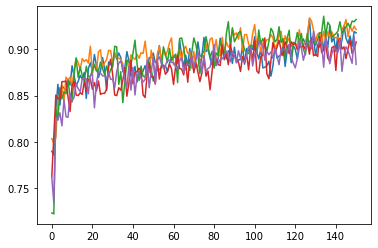

In [31]:
for acc in train_accs:
    plt.plot(acc)

In [27]:
predictions

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

In [29]:
labels[24]

tensor([1, 0])

In [ ]:
def test_dataset_class():
    filename = '../tests/test_assets/test_labels_unclean.csv'
    image_dir = '../tests/test_assets/test_images'
    
    #Eventually just read in already cleaned labels sheet
    labels = prep_data(pd.read_csv(filename), image_dir)
    
    
    transform = None
    test_dataset = tenX_dataset(labels, image_dir, transform)
    
    #len() check
    length = len(test_dataset)
    expect = 5
    assert length is expect, f'10x dataset length method failed. Got {length}, should be {expect}'
    
    #get_item() check
    samples = []
    keys = ['image', 'plastic','shape','color']
    for i in range(len(test_dataset)):
        assert test_dataset[i]['image'] is not None, 'Got NoneType instead of image'
        isP = test_dataset[i]['plastic']
        assert math.isclose(0,isP) or math.isclose(1,isP), f'plastic not 0 or 1, instead is {isP}'
        length = len(test_dataset[i]['shape'])
        assert length is 4, f'length of shape array not 4, instead is {length}'
        samples.append(test_dataset[i])
        
    shape = samples[0]['shape']
    assert math.isclose(shape[2], 1),  f'wrong shape first image, is {shape}'
    color = samples[0]['color']
    assert math.isclose(color[0], 1), f'wrong color first image, is {color}'
    assert math.isclose(samples[4]['plastic'], 1), 'wrong plastic id 3rd image'
    
test_dataset_class()

In [ ]:
#0 - BASE LINE 82% naive and 88% model test set accuracy
#1 - 9 output CNN1, 18 output CNN2 87% test vs 77% naive
#2 - 3rd linear layer telescoped (12*39*39 -> 2048 -> 256- >2). 93% test, 87% naive
#3 - added a convulutional layer, 12 -> 24 no good
#2d dropout after convolutions led to predicting all pastics, i also read dropouts after convultions is bad, going to try batch normalizations though
#Another paper I read said that non-adaptive optimizers were better for CNN's if thehyperparameters are tunned
#tuned correctly but are much slower so I don't want to even try given it takes me 20min to train already
#adding batchnormalization after convultions improved training results alot, but not test which is weird since
#its supposed to reduce overfitting. Im going to run again overnight